<a href="https://www.kaggle.com/code/dishaasinghi/breast-cancer-logistic-regression?scriptVersionId=127283574" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# Table of Contents:

* [Python Libraries](#section-zero)
* [Introduction](#section-one)
    - [Data Cleaning](#subsection-one)
* [Feature Selection](#section-two)
    - [Inferences](#subsection-two)
    - [Model Selection](#subsection-three)
    - [Logistic Regression](#subsection-four)
* [Conclusion](#section-three)


<a id="section-zero"></a>
# Python Libraries:

Before starting with the code, it is necessary to import all the required Python Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id="section-one"></a>
# Introduction

***In this dataset we have been provided with a number of parameters which will help us to predict whether the tumor is malignant or benign.***

**The parameters provided to us are:** 
* ID number
* Diagnosis (M = malignant, B = benign)

***Ten real-valued features are computed for each cell nucleus:***
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension

In [3]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [4]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

<a id="subsection-one"></a>
# Data Cleaning and Analysis

In [5]:
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [6]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

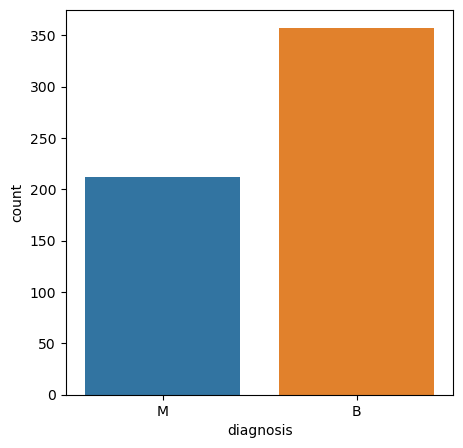

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='diagnosis')

In [8]:
df['diagnosis'].replace({"M":1,"B":0},inplace=True)

In [9]:
df.shape

(569, 31)

In [10]:
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [11]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<a id="section-two"></a>
# Feature Selection:

1. Why we dropped so many columns:
- Many columns are correlated to one another because of which we choose only 1 column out of them.

2. Dropping ID and Unnamed: 32
- Since they not not of relevance to us and unnecessary with Unnamed having only NaN values, we decided to drop them

In [12]:
to_drop = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
df.drop(to_drop, axis=1, inplace=True)

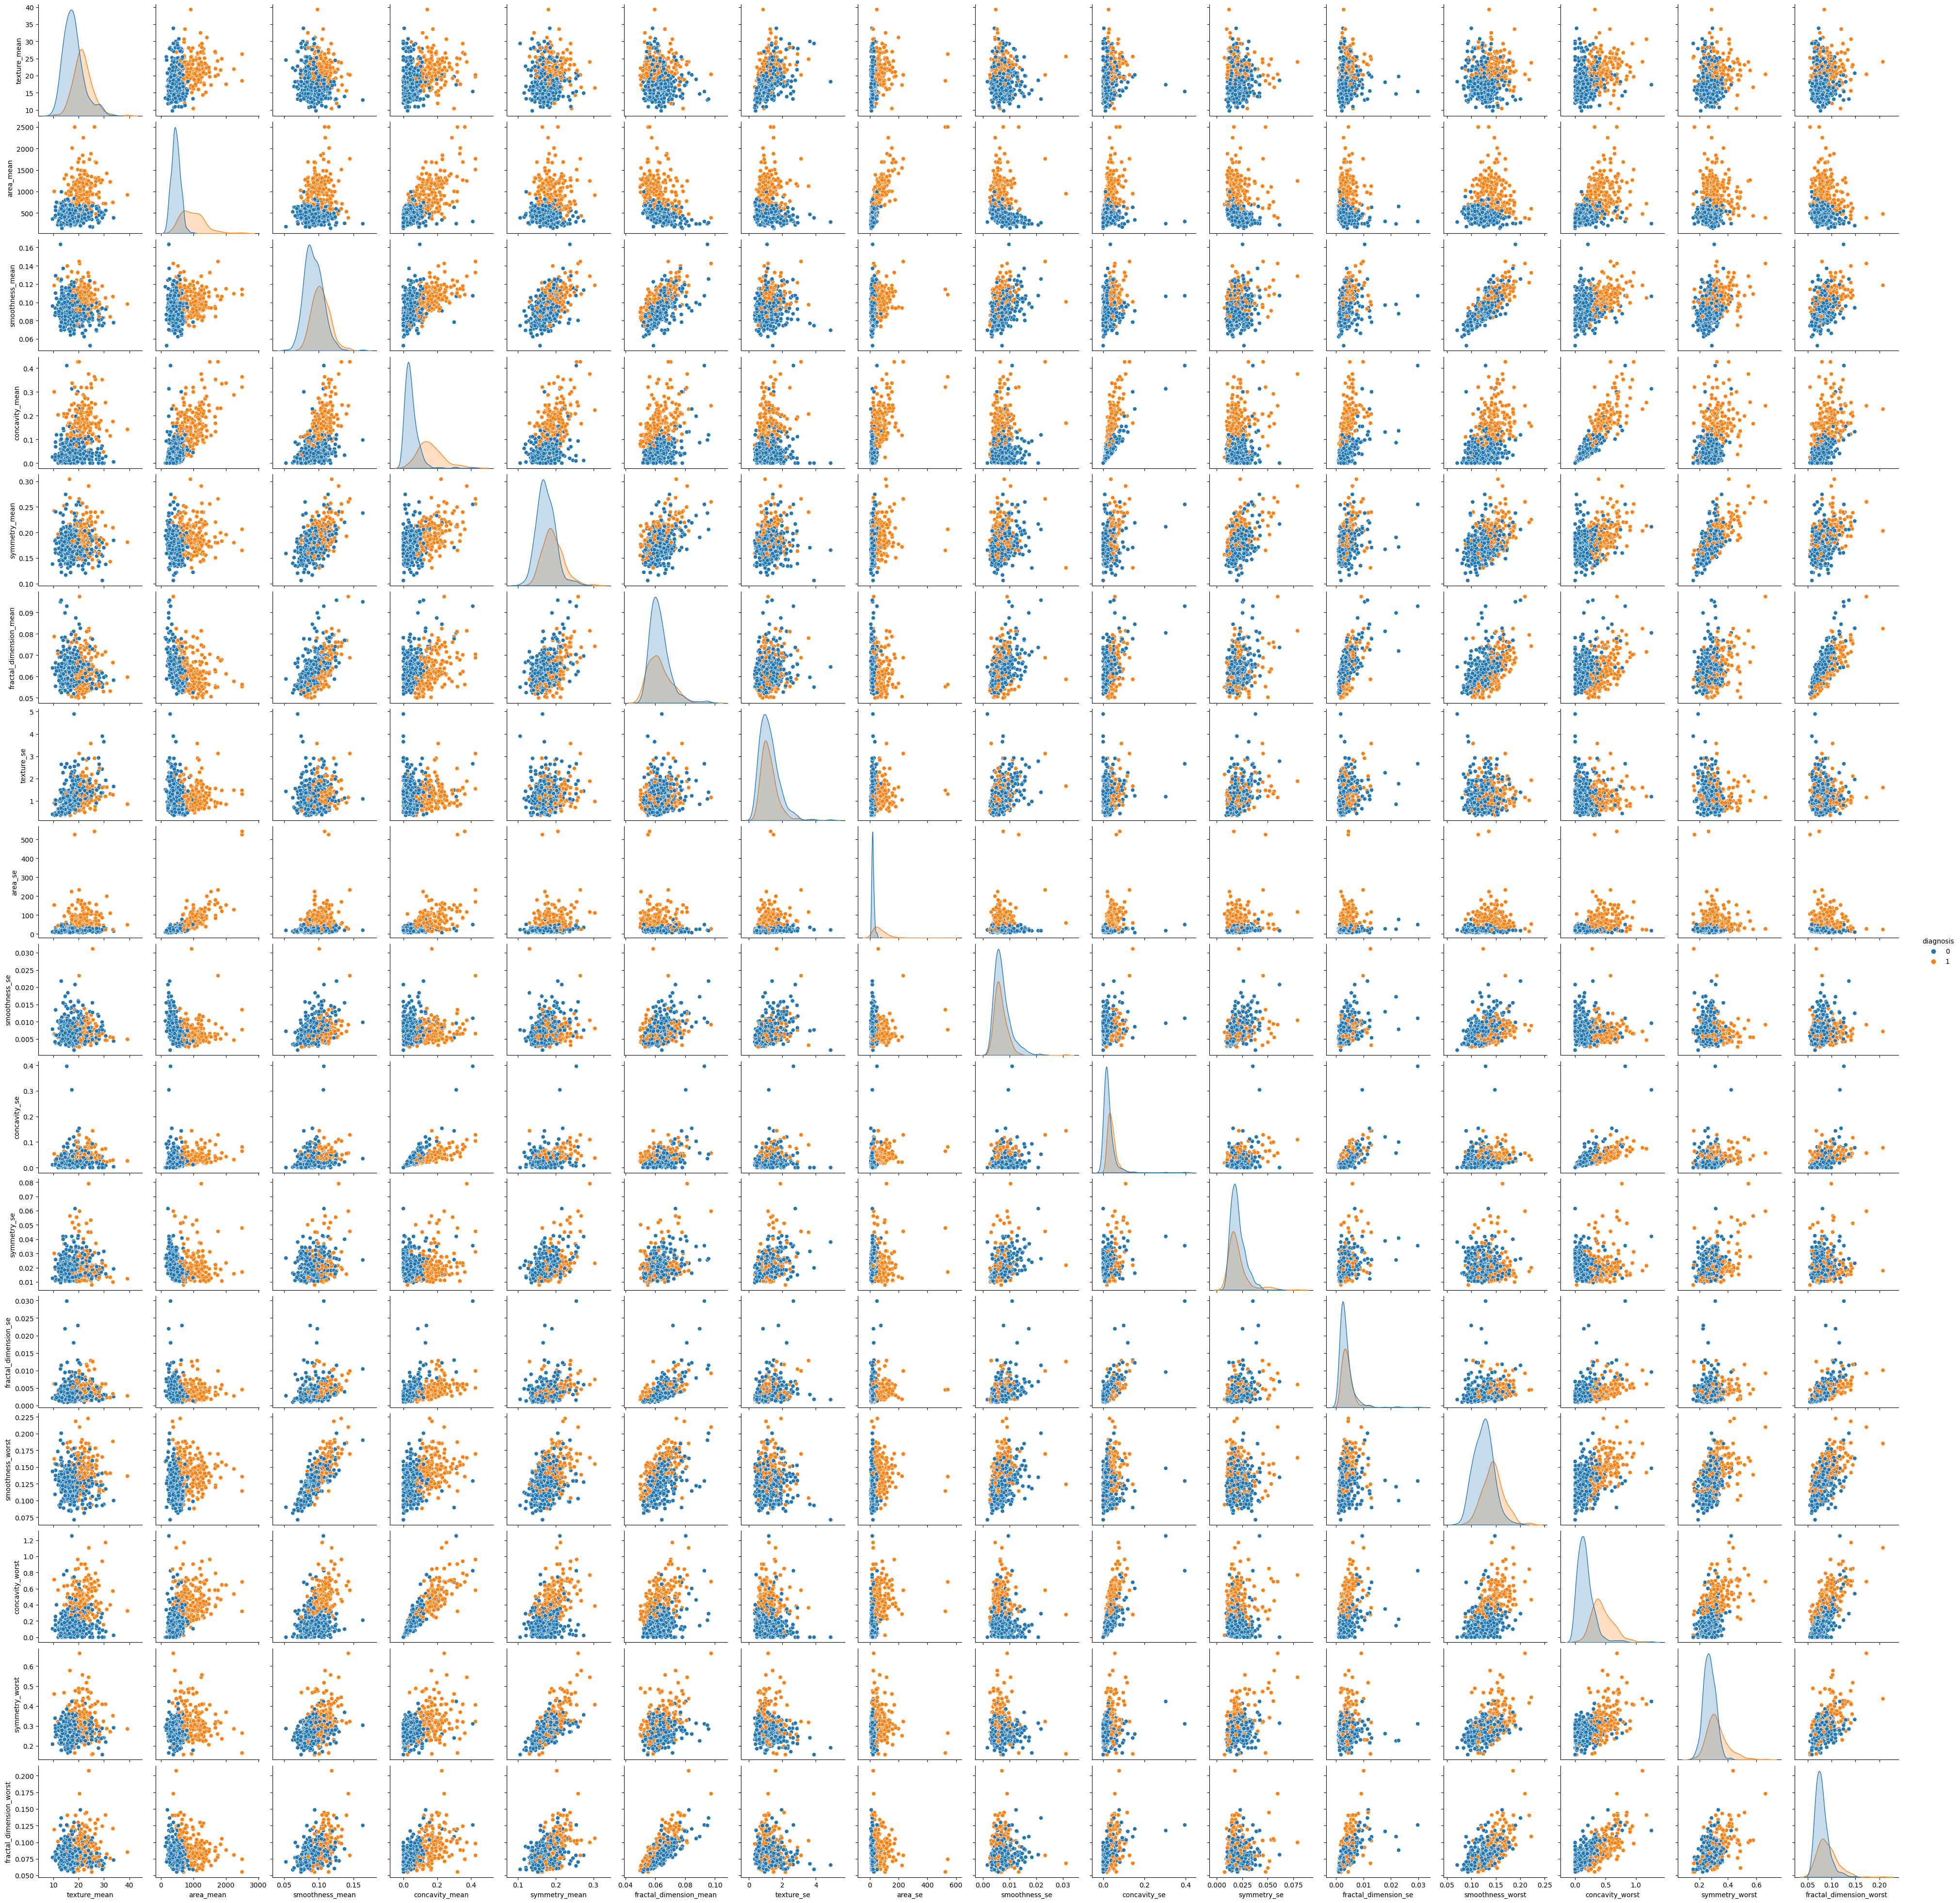

In [13]:
sns.pairplot(data=df, hue='diagnosis')

<AxesSubplot:>

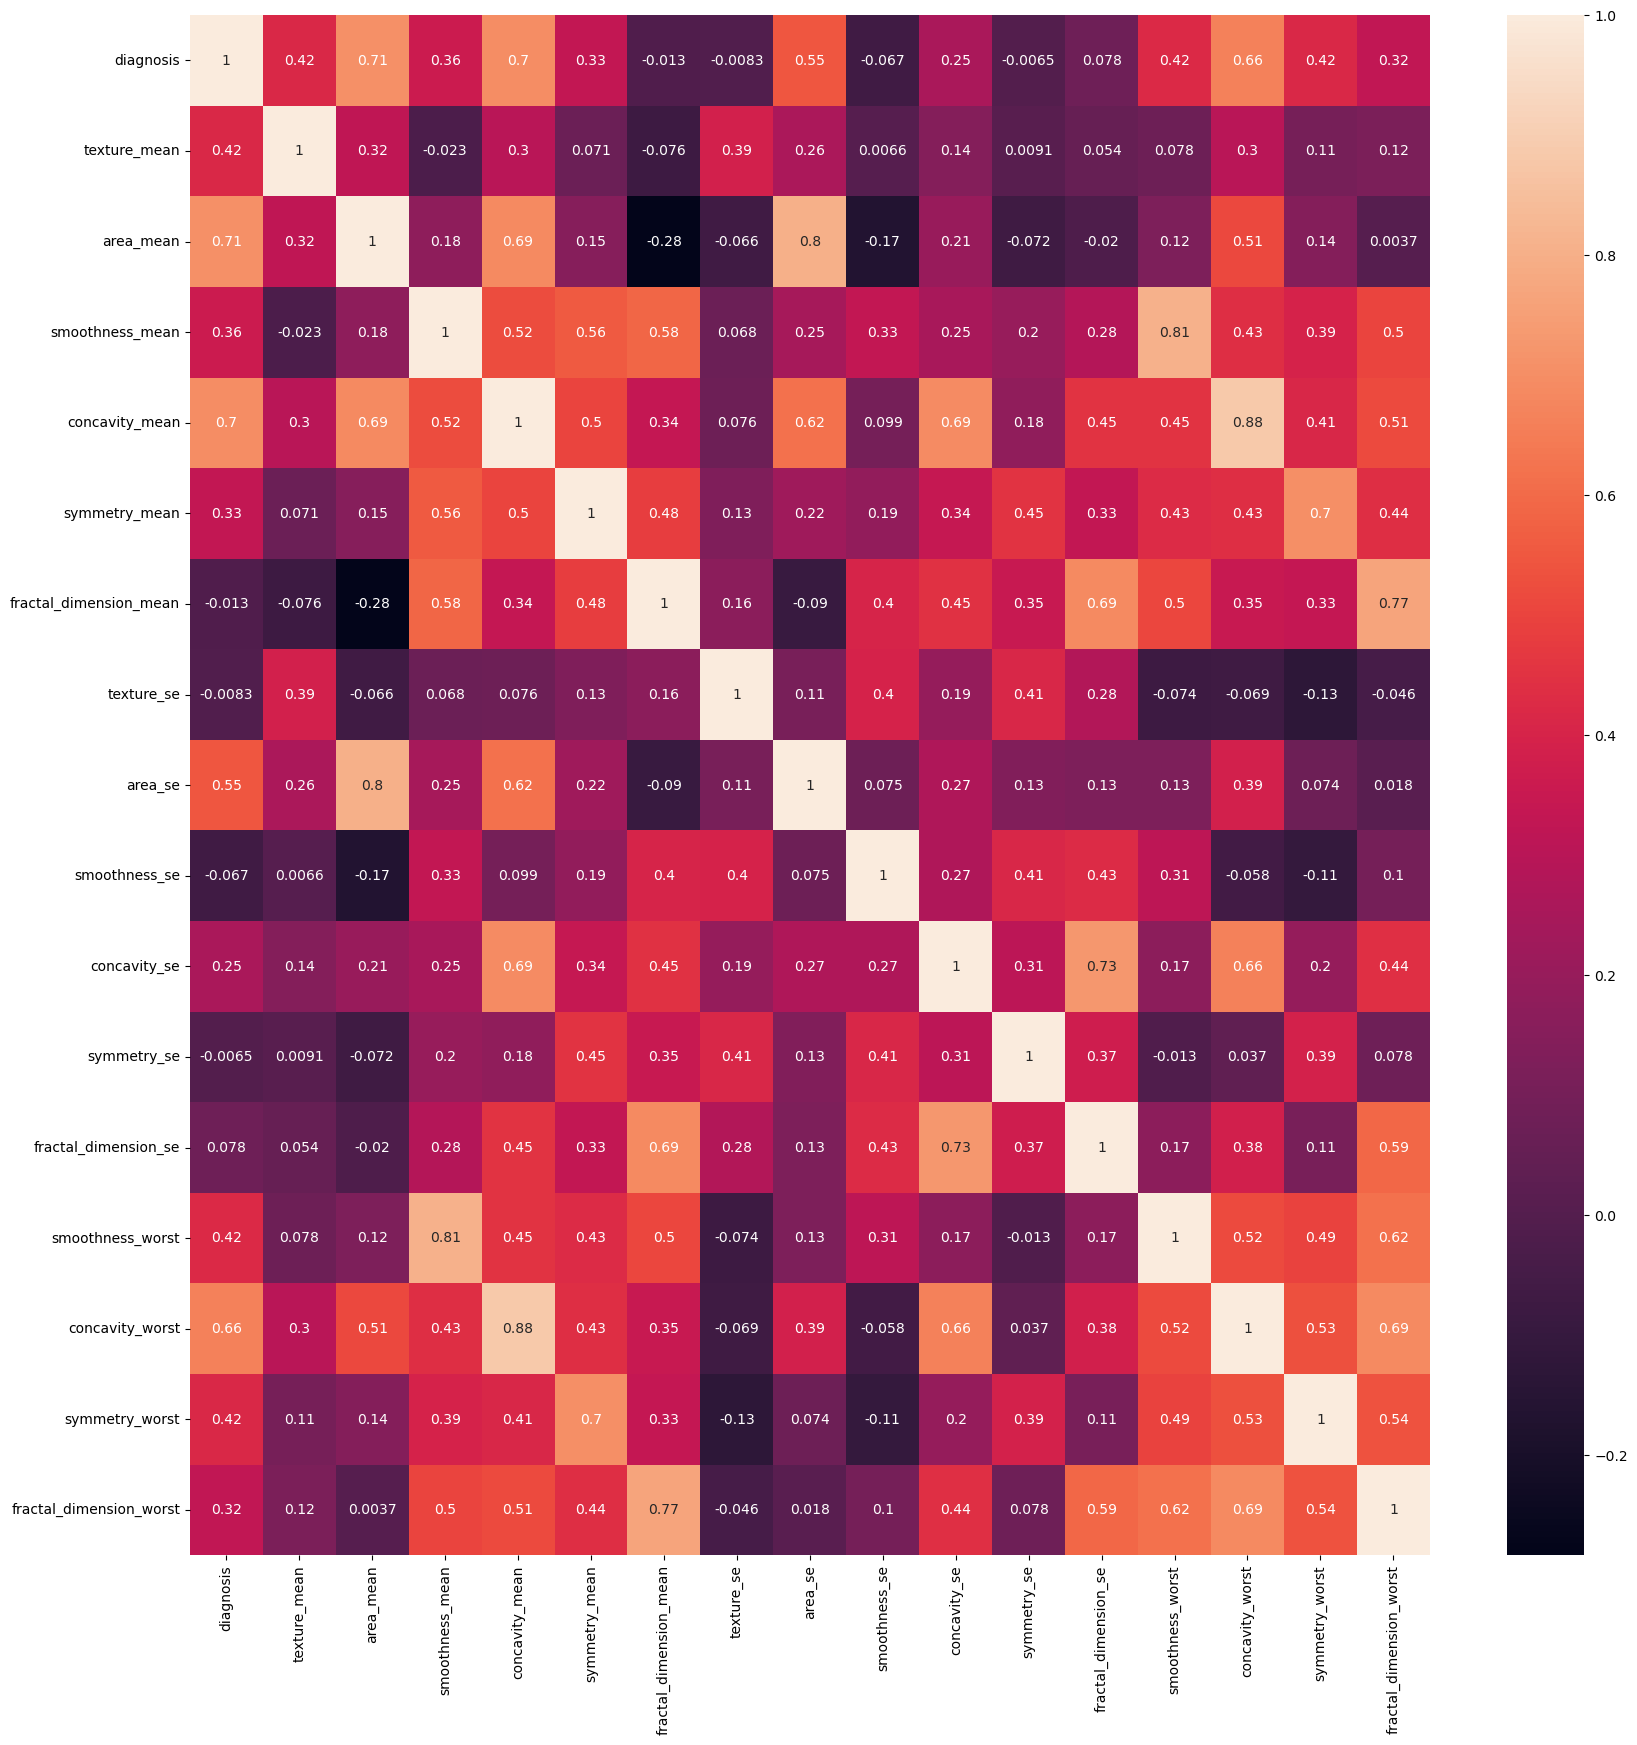

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

<a id="subsection-two"></a>
# Inferences:

* Most of the parameters are positively correlated to Diagnosis
* Only four parameters seemed to be negatively correlated to Diagnosis
* Few parameters are highly correlated to Diagnosis (>0.5)
* From the pairplot it is also observed that there are a number of outliers that are present. Thus we need to work on those outliers to get a perfect model

In [15]:
X=df.drop('diagnosis', axis=1)
y=df['diagnosis']

<a id="subsection-three"></a>
# Model Selection 

Here, we will be splitting our dataset into train and test data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
import warnings
warnings.filterwarnings("ignore")

<a id="subsection-four"></a>
# Logistic Regression Analysis

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
clf=LogisticRegression()
parameters = {'C':[1, 10, 20, 30, 40, 50, 70, 100, 200, 300], 
              'penalty':['l1','l2','elasticnet'], 'max_iter':[100,200,300]}
clf_reg = GridSearchCV(clf, param_grid=parameters, scoring='accuracy', cv=5,)

In [19]:
clf_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20, 30, 40, 50, 70, 100, 200, 300],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [20]:
print(clf_reg.best_params_)

{'C': 200, 'max_iter': 200, 'penalty': 'l2'}


In [21]:
print(clf_reg.best_score_)

0.9606288448393713


In [22]:
y_pred=clf_reg.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, classification_report

In [24]:
accuracy=accuracy_score(y_pred, y_test)
accuracy

0.9680851063829787

In [25]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       119
           1       0.97      0.94      0.96        69

    accuracy                           0.97       188
   macro avg       0.97      0.96      0.97       188
weighted avg       0.97      0.97      0.97       188



<a id="section-three"></a>
# Final Conclusions:

1. The accuracy using Logistic Regression is really good which is nearly 97%
2. The reason why we used Logistic Regression because of binary classification
3. There were many outliers (as shown in pairplot) which we can work on to improve the accuracy of the model